<a href="https://colab.research.google.com/github/Lufl3005/Business-Analytics/blob/main/Reto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


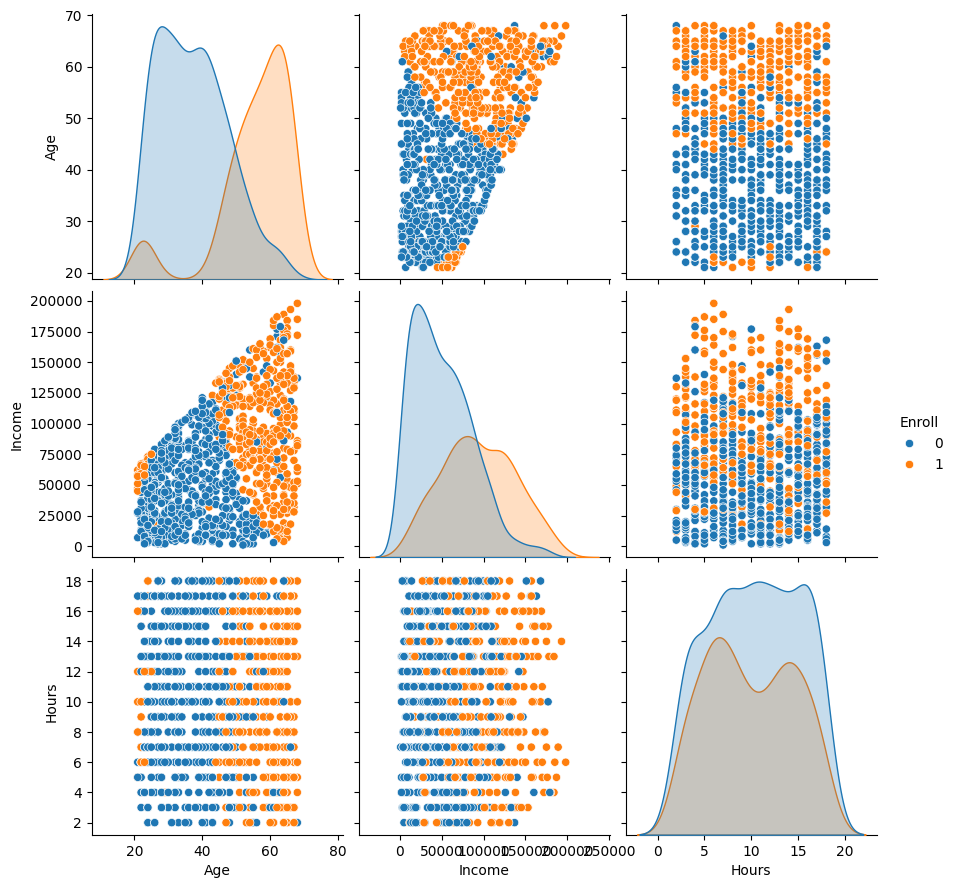

In [ ]:
nxl = "/content/drive/MyDrive/Universidad :)/Semestre 3/Analítica de Negocios/3. BD1-GymData_Int.xlsx"
XDB = pd.read_excel(nxl,sheet_name = 0)
XDB=XDB.dropna()
XDB.head(100)

XDB=XDB[[ "Age", "Income", "Hours", "Enroll"]]

sns.pairplot(XDB, hue="Enroll", size=3, vars=["Age", "Income", "Hours" ])

Esta es la que tiene mayor correlación: 
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000


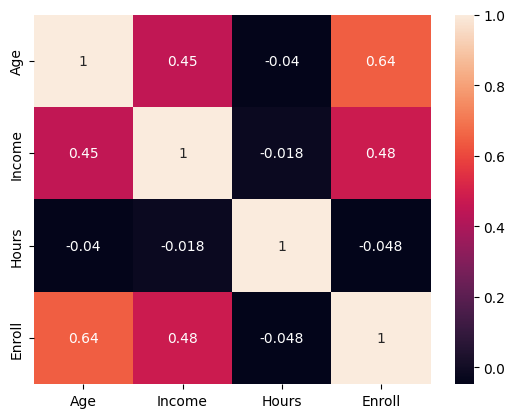

In [ ]:
corr= XDB.corr()
sns.heatmap(corr, annot=True)
print("Esta es la que tiene mayor correlación: \n", corr)

In [ ]:
XD=np.array(XDB.iloc[:,0:3])
yd=np.array(XDB.iloc[:,3])

XD

array([[   26, 18000,    14],
       [   43, 13000,     9],
       [   55, 42000,    16],
       ...,
       [   55, 70000,    17],
       [   68, 64000,    15],
       [   48, 67000,    18]])

In [ ]:
#Modelo KNN
mknn = KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)

#Evaluar el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión: \n", cm)

VN = cm[0,0]; FP = cm[0,1]; FN = cm[1,0]; VP = cm[1,1]

Ex = (VP + VN)/len(XD)
print("La Exactitud del Modelo es: ", Ex)

Sen = VP/(VP + FN)
print("La Sensibilidad del Modelo es: ", Sen)

Esp = VN/(VN + FP)
print("La Especificidad del Modelo es: ", Esp)

Esta es la matriz de confusión: 
 [[538  59]
 [145 258]]
La Exactitud del Modelo es:  0.796
La Sensibilidad del Modelo es:  0.6401985111662531
La Especificidad del Modelo es:  0.9011725293132329


In [ ]:
#1 Membresía
XDP=np.array([[26, 800, 15]])
ydpp=mknn.predict(XDP)
print("Compra membresía?: ", ydpp)

Compra membresía?:  [0]


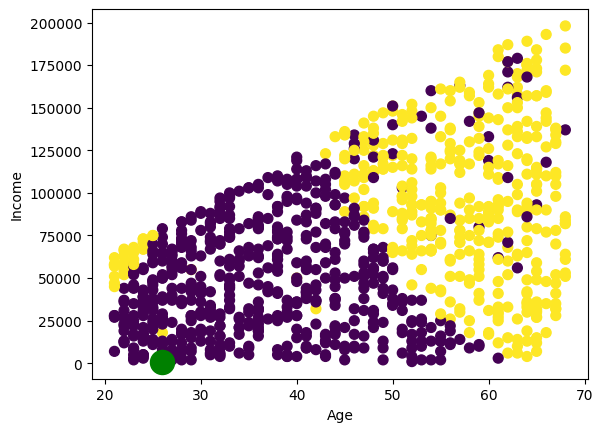

In [ ]:
#Graficas siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:, 0],XD[:, 1], c=yd, s=50, cmap="viridis")
plt.scatter(XDP[:,0],XDP[:,1], marker= "o", s=300, facecolors="green")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dónde quedó el primer solicitante :  3
Dónde quedó el segundo solicitante :  3
Dónde quedó el tercer solicitante :  1


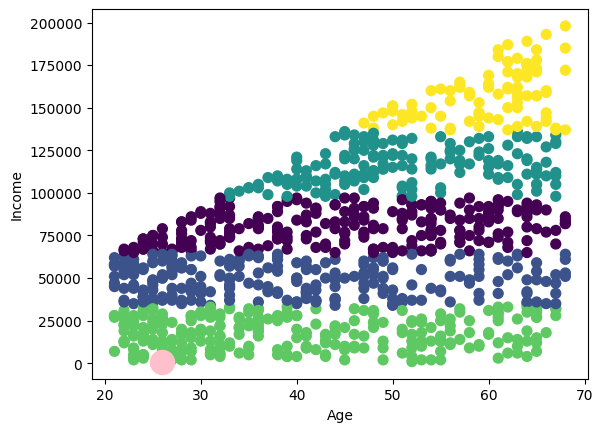

El porcentaje de aprobados por el cluster 1 es:  116
El porcentaje de negados por el cluster 1 es:  130
------------------------------------------------------------
El porcentaje de aprobados por el cluster 2 es:  66
El porcentaje de negados por el cluster 2 es:  172
------------------------------------------------------------
El porcentaje de aprobados por el cluster 2 es:  107
El porcentaje de negados por el cluster  es:  50
------------------------------------------------------------
El porcentaje de aprobados por el cluster 3 es:  41
El porcentaje de negados por el cluster 3 es:  230
------------------------------------------------------------
El porcentaje de aprobados por el cluster 4 es:  73
El porcentaje de negados por el cluster 4 es:  15
------------------------------------------------------------
El total de los datos es:  1000
Característico sociodemográfica de cada cluster son: 
  [[4.48577236e+01 8.01463415e+04 1.03333333e+01]
 [3.97478992e+01 4.93655462e+04 1.02815126e+0

In [ ]:
# K-Means(Montoncitos de datos - Clusters)
np.random.seed(42)
mkm=KMeans(n_clusters=5,init= "random", random_state= 42)
mkm.fit(XD, yd)
labels=mkm.labels_
print("Dónde quedó el primer solicitante : ", labels[0,])
print("Dónde quedó el segundo solicitante : ", labels[1,])
print("Dónde quedó el tercer solicitante : ", labels[2,])

#Se mapean los clusters
plt.scatter(XD[:, 0],XD[:, 1], c=labels, s=50, cmap="viridis")
plt.scatter(XDP[:,0],XDP[:,1], marker= "o", s=300, facecolors="pink")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

#Porcentaje de aprobados y negados del cluster 0
c10=len(np.where((labels==0) & (yd==0))[0])
c11=len(np.where((labels==0) & (yd==1))[0])
print("El porcentaje de aprobados por el cluster 1 es: ", c11)
print("El porcentaje de negados por el cluster 1 es: ", c10)
print("------------------------------------------------------------")

#Porcentaje de aprobados y negados del cluster 1
c20=len(np.where((labels==1) & (yd==0))[0])
c21=len(np.where((labels==1) & (yd==1))[0])
print("El porcentaje de aprobados por el cluster 2 es: ", c21)
print("El porcentaje de negados por el cluster 2 es: ", c20)
print("------------------------------------------------------------")

#Porcentaje de aprobados y negados del cluster 2
c30=len(np.where((labels==2) & (yd==0))[0])
c31=len(np.where((labels==2) & (yd==1))[0])
print("El porcentaje de aprobados por el cluster 2 es: ", c31)
print("El porcentaje de negados por el cluster  es: ", c30)
print("------------------------------------------------------------")

#Porcentaje de aprobados y negados del cluster 3
c40=len(np.where((labels==3) & (yd==0))[0])
c41=len(np.where((labels==3) & (yd==1))[0])
print("El porcentaje de aprobados por el cluster 3 es: ", c41)
print("El porcentaje de negados por el cluster 3 es: ", c40)
print("------------------------------------------------------------")

#Porcentaje de aprobados y negados del cluster 4
c50=len(np.where((labels==4) & (yd==0))[0])
c51=len(np.where((labels==4) & (yd==1))[0])
print("El porcentaje de aprobados por el cluster 4 es: ", c51)
print("El porcentaje de negados por el cluster 4 es: ", c50)
print("------------------------------------------------------------")

print("El total de los datos es: ", c10+c11+c20+c21+c30+c31+c40+c41+c50+c51)
#Característico sociodemográfica
clusters=mkm.cluster_centers_
print("Característico sociodemográfica de cada cluster son: \n ", clusters)

#**Analisis de resultados**
De acuerdo con la base de datos, el modelo KNN y el modelo K-Means, se puede observar un total de 1000 datos, divididos en 5 clusters: el primero con 246 datos (116 compran membresía y 130 no), el segundo con 238 datos (176 compran membresía y 66 no), el tercero con 157 datos (107 compran membresía y 50 no), el cuarto con 271 datos (41 compran membresía y 230 no) y el quinto con 88 datos (73 compran membresía y 15 no). Es decir que 403 comprarán membresía y 597 no esto representa el 40,3% y el 59,7% respectivamente. El cluster que presenta la mayor edad es el cluster 4, el que presenta los mayores ingresos es el cluster 1 y los que estarán en el GYM por un mayor número de horas son los del cluster 2.

De acuerdo con el pronostico relizado por el modelo, este alcanzó una exactitud cercana a 80%, una sensibilidad de 64% y una especificidad de 90%, esto quieres decir que es un modelo bastante bueno. La variable que mejor lleva a cabo el proceso de caracterización de inscripción de una person al GYM es Age y las variables que tienen una mayor correlación entre sí son: Age y Enroll. Para el ejemplo de la persona con (Age:26, Income: 800, Hours: 15), el modelo determinó que esta persona no va a comprar membresía.